In [1]:
import random
import string
import re
import base64
from collections import Counter
from time import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from pywaffle import Waffle

import nltk
from nltk.stem import WordNetLemmatizer

# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("genesis")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kodascii/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/kodascii/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to /home/kodascii/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kodascii/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/kodascii/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
df = pd.read_csv('res/spooky.csv')
df.head(5)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [3]:
def df_split_train_test(df, train):
    num_elements = int(len(df) * 0.8)
    train_indices = random.sample(range(1, len(df)), num_elements)
    test_indices = list(set(range(0, len(df))) - set(train_indices))

    return df.iloc[train_indices], df.iloc[test_indices]

In [5]:
df_train, df_test = df_split_train_test(df, train=0.8)

print(f"==>> len(df): {len(df)}")
print(f'==>> len(train + test): {len(df_train)} + {len(df_test)} = {len(df_train) + len(df_test)}')

==>> len(df): 19579
==>> len(train + test): 15663 + 3916 = 19579


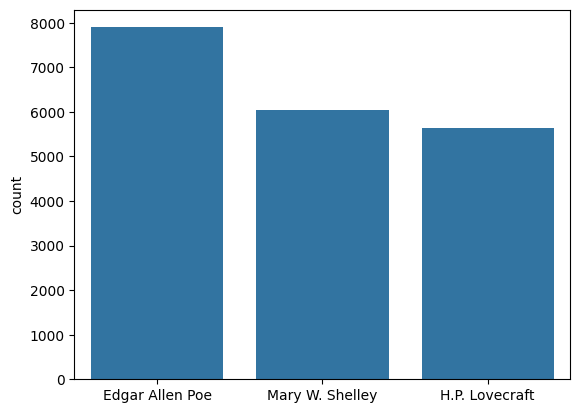

In [6]:
fig = plt.figure()
g = sns.barplot(
    x=["Edgar Allen Poe", "Mary W. Shelley", "H.P. Lovecraft"],
    y=df["author"].value_counts(),
)